In [1]:
import requests
import json
import time
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

url = "https://fantasy.premierleague.com/api/bootstrap-static/2342/"

response = requests.get(url)

In [2]:
def get_data():
    """ Retrieve the fpl player data from the hard-coded url
    """
    response = requests.get("https://fantasy.premierleague.com/api/bootstrap-static/")
    if response.status_code != 200:
        raise Exception("Response was code " + str(response.status_code))
    responseStr = response.text
    data = json.loads(responseStr)
    return data

In [3]:
def main():
    data = get_data()
    with open('.data/raw.json', 'w') as outf:
        json.dump(data, outf)
    return data

In [4]:
players = get_data()['elements']
teams = get_data()['teams']
data = get_data()

In [5]:
players = {player.pop('id'):player for player in players}

In [6]:
for player in players.keys():
    pass
print(type(player))

<class 'int'>


In [7]:
len(players[player].keys())

66

In [8]:
import pandas as pd
pd.DataFrame.from_dict(players, orient='index')

,chance_of_playing_next_round,chance_of_playing_this_round,code,cost_change_event,cost_change_event_fall,cost_change_start,cost_change_start_fall,dreamteam_count,element_type,ep_next,...,threat_rank,threat_rank_type,ict_index_rank,ict_index_rank_type,corners_and_indirect_freekicks_order,corners_and_indirect_freekicks_text,direct_freekicks_order,direct_freekicks_text,penalties_order,penalties_text
1,100.0,100.0,80201,0,0,-5,5,0,1,0.0,...,581,60,425,30,NaN,,NaN,,NaN,
2,0.0,0.0,115918,0,0,0,0,0,1,0.0,...,471,19,527,53,NaN,,NaN,,NaN,
3,0.0,0.0,47431,0,0,-2,2,0,3,0.0,...,710,294,710,294,NaN,,NaN,,NaN,
4,0.0,0.0,54694,0,0,-4,4,0,4,0.0,...,37,16,99,23,NaN,,NaN,,NaN,
5,100.0,100.0,58822,0,0,-3,3,0,2,5.0,...,349,122,341,116,NaN,,NaN,,NaN,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
661,0.0,0.0,428610,0,0,0,0,0,3,0.0,...,620,247,643,250,NaN,,NaN,,NaN,
685,NaN,NaN,510362,0,0,0,0,0,2,0.5,...,652,237,445,161,NaN,,NaN,,NaN,
686,0.0,0.0,225000,0,0,0,0,0,2,0.0,...,480,184,536,194,NaN,,NaN,,NaN,
687,0.0,0.0,232351,0,0,0,0,0,3,0.0,...,607,241,631,244,NaN,,NaN,,NaN,


In [9]:
players = pd.json_normalize(data['elements']).set_index(['id'])
players.head()

,chance_of_playing_next_round,chance_of_playing_this_round,code,cost_change_event,cost_change_event_fall,cost_change_start,cost_change_start_fall,dreamteam_count,element_type,ep_next,...,threat_rank,threat_rank_type,ict_index_rank,ict_index_rank_type,corners_and_indirect_freekicks_order,corners_and_indirect_freekicks_text,direct_freekicks_order,direct_freekicks_text,penalties_order,penalties_text
id,,,,,,,,,,,,,,,,,,,,,
1,100.0,100.0,80201,0,0,-5,5,0,1,0.0,...,581,60,425,30,NaN,,NaN,,NaN,
2,0.0,0.0,115918,0,0,0,0,0,1,0.0,...,471,19,527,53,NaN,,NaN,,NaN,
3,0.0,0.0,47431,0,0,-2,2,0,3,0.0,...,710,294,710,294,NaN,,NaN,,NaN,
4,0.0,0.0,54694,0,0,-4,4,0,4,0.0,...,37,16,99,23,NaN,,NaN,,NaN,
5,100.0,100.0,58822,0,0,-3,3,0,2,5.0,...,349,122,341,116,NaN,,NaN,,NaN,


In [10]:
good_players = players.drop(players[players['minutes'] < 90].index)

for i, player in good_players.iterrows():
    print(player['web_name'])

Leno
Aubameyang
Cédric
Lacazette
Xhaka
Marí
Kolasinac
Elneny
Maitland-Niles
Holding
Partey
Tierney
Pépé
Nketiah
Smith Rowe
Saka
Gabriel
Martinelli
White
Tavares
Sambi Lokonga
Ødegaard
Ramsdale
Tomiyasu
Chambers
Steer
Martínez
Traoré
Sanson
McGinn
Hause
Mings
Watkins
Nakamba
Buendía
Cash
Konsa
Douglas Luiz
Ramsey
Young
Digne
Ings
Bailey
Chukwuemeka
Coutinho
Jansson
Nørgaard
Toney
Raya
Canós
Dasilva
Henry
Janelt
Ghoddos
Jensen
Goode
Forss
Roerslev
Sørensen
Pinnock
Mbeumo
Onyeka
Ajer
Thompson
Baptiste
Wissa
Fernández
Zanka
Lössl
Eriksen
Lallana
Steele
Groß
Duffy
Dunk
March
Webster
Veltman
Maupay
Trossard
Sánchez
Bissouma
Lamptey
Connolly
Alzate
Mac Allister
Moder
Welbeck
Mwepu
Cucurella
Tarkowski
Pieters
Cork
Stephens
Rodriguez
Barnes
Mee
Westwood
Gudmundsson
Lowton
Vydra
Pope
Taylor
Brownhill
McNeil
Collins
Hennessey
Lennon
Cornet
Roberts
Weghorst
Azpilicueta
Thiago Silva
Alonso
Jorginho
Barkley
Kovacic
Rüdiger
Arrizabalaga
Kanté
Ziyech
Loftus-Cheek
Christensen
Werner
Chilwell
Pulisic
Mo

In [11]:
good_players.groupby(['element_type']).mean()

,chance_of_playing_next_round,chance_of_playing_this_round,code,cost_change_event,cost_change_event_fall,cost_change_start,cost_change_start_fall,dreamteam_count,event_points,in_dreamteam,...,influence_rank_type,creativity_rank,creativity_rank_type,threat_rank,threat_rank_type,ict_index_rank,ict_index_rank_type,corners_and_indirect_freekicks_order,direct_freekicks_order,penalties_order
element_type,,,,,,,,,,,,,,,,,,,,,
1,85.000000,85.000000,107040.710526,-0.026316,0.026316,-0.552632,0.552632,0.736842,1.921053,0.026316,...,19.500000,534.631579,42.526316,601.526316,56.947368,315.263158,19.500000,NaN,NaN,NaN
2,77.166667,73.809524,165415.725146,-0.011696,0.011696,-1.029240,1.029240,0.631579,1.584795,0.023392,...,86.070175,267.888889,86.578947,281.666667,88.771930,261.707602,86.134503,2.437500,2.846154,3.500000
3,87.426901,85.147059,175443.943005,-0.020725,0.020725,-1.512953,1.512953,0.637306,2.020725,0.025907,...,97.487047,168.943005,97.497409,189.430052,98.430052,202.787565,97.455959,2.794118,2.737705,2.789474
4,82.000000,81.500000,156717.018519,-0.018519,0.018519,-1.296296,1.296296,0.907407,2.351852,0.018519,...,27.722222,193.240741,27.574074,99.277778,27.666667,164.444444,27.611111,3.000000,2.750000,2.038462


In [12]:
def get_player_hist(i, url='https://fantasy.premierleague.com/api/element-summary/'):
    response = requests.get(url+str(i)+'/')
    if response.status_code != 200:
        raise Exception('Respone was code ' + str(response.status_code))
    return json.loads(response.text)

In [13]:
pls = [4, 32, 281, 228, 61]
d = [get_player_hist(i) for i in good_players.index]


In [14]:
d[0]['history']

[{'element': 1,
  'fixture': 1,
  'opponent_team': 3,
  'total_points': 1,
  'was_home': False,
  'kickoff_time': '2021-08-13T19:00:00Z',
  'team_h_score': 2,
  'team_a_score': 0,
  'round': 1,
  'minutes': 90,
  'goals_scored': 0,
  'assists': 0,
  'clean_sheets': 0,
  'goals_conceded': 2,
  'own_goals': 0,
  'penalties_saved': 0,
  'penalties_missed': 0,
  'yellow_cards': 0,
  'red_cards': 0,
  'saves': 1,
  'bonus': 0,
  'bps': 11,
  'influence': '11.8',
  'creativity': '0.0',
  'threat': '0.0',
  'ict_index': '1.2',
  'value': 50,
  'transfers_balance': 0,
  'selected': 153122,
  'transfers_in': 0,
  'transfers_out': 0},
 {'element': 1,
  'fixture': 18,
  'opponent_team': 6,
  'total_points': 2,
  'was_home': True,
  'kickoff_time': '2021-08-22T15:30:00Z',
  'team_h_score': 0,
  'team_a_score': 2,
  'round': 2,
  'minutes': 90,
  'goals_scored': 0,
  'assists': 0,
  'clean_sheets': 0,
  'goals_conceded': 2,
  'own_goals': 0,
  'penalties_saved': 0,
  'penalties_missed': 0,
  'yello

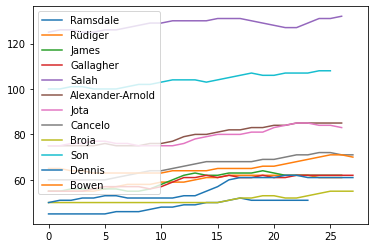

In [31]:
value = []
label = []
fig, ax = plt.subplots()
for ind_id, player in enumerate(d):
    value = []
    for gw in player['history']:
        value.append(gw['value'])

    if (value[0] + 4) < value[-1]: 
        #Plotting only people who's value has increased by more than 0.5mill
        name = good_players['web_name'].loc[good_players.index[ind_id]]
        ax.plot(np.arange(0, len(value)), value, label=name)
ax.legend()
    #for season in player['history_past']:
    #    print(season['season_name'])
    #print('----')

In [16]:
players.columns

Index(['chance_of_playing_next_round', 'chance_of_playing_this_round', 'code',
       'cost_change_event', 'cost_change_event_fall', 'cost_change_start',
       'cost_change_start_fall', 'dreamteam_count', 'element_type', 'ep_next',
       'ep_this', 'event_points', 'first_name', 'form', 'in_dreamteam', 'news',
       'news_added', 'now_cost', 'photo', 'points_per_game', 'second_name',
       'selected_by_percent', 'special', 'squad_number', 'status', 'team',
       'team_code', 'total_points', 'transfers_in', 'transfers_in_event',
       'transfers_out', 'transfers_out_event', 'value_form', 'value_season',
       'web_name', 'minutes', 'goals_scored', 'assists', 'clean_sheets',
       'goals_conceded', 'own_goals', 'penalties_saved', 'penalties_missed',
       'yellow_cards', 'red_cards', 'saves', 'bonus', 'bps', 'influence',
       'creativity', 'threat', 'ict_index', 'influence_rank',
       'influence_rank_type', 'creativity_rank', 'creativity_rank_type',
       'threat_rank', 'thr

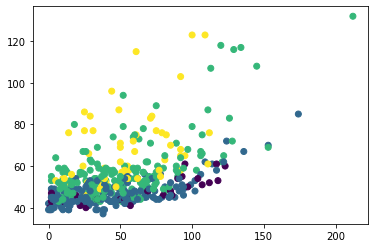

In [17]:
fig, ax = plt.subplots()
ax.scatter(good_players['total_points'], good_players['now_cost'], c=good_players['element_type'])

In [1]:
fig, ax = plt.subplots()
ax.scatter(players['total_points'], players['now_cost']/10, c=players['element_type'])
ax.set_xlim([0, 200])
ax.set_ylabel('Value (millions)')
ax.set_xlabel('Total points')
ax.set_title('FPL Value vs Points')

NameError: name 'plt' is not defined

In [19]:
players['web_name'].loc[players['total_points'] > 100]

id
21           Smith Rowe
22                 Saka
23              Gabriel
559            Ramsdale
121        Thiago Silva
127             Rüdiger
138               Mount
142               James
144           Gallagher
212            Maddison
196            Raphinha
229            van Dijk
230                Mané
231             Alisson
233               Salah
234           Robertson
237    Alexander-Arnold
240                Jota
251           De Bruyne
254              Mahrez
255            Sterling
256             Cancelo
257             Ederson
259             Laporte
261            Bernardo
262                Dias
270              de Gea
277           Fernandes
341         Ward-Prowse
353              Lloris
357                Kane
359                 Son
450              Dennis
413             Antonio
420               Bowen
429               Coady
475                  Sá
Name: web_name, dtype: object

In [30]:
# identifying the best value for money players
for player in data['elements']:
    if player['total_points']/player['now_cost'] > 2:
        print(player['web_name'])

Ramsdale
van Dijk
Alisson
Alexander-Arnold
Cancelo
Laporte
de Gea
Bowen
Coady
Kilman
Sá


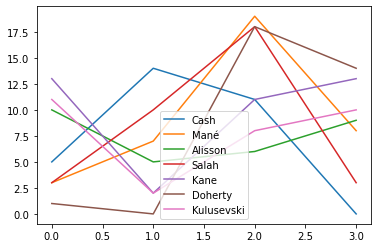

In [21]:
# using gameweke data d

label = []
fig, ax = plt.subplots()
for ind_id, player in enumerate(d):
    points = []
    for gw in player['history']:
        points.append(gw['total_points'])

    if sum(points[-4:]) > 28: 
        #Plotting only people who's value has increased by more than 0.5mill
        name = good_players['web_name'].loc[good_players.index[ind_id]]
        ax.plot(np.arange(0, len(points[-4:])), points[-4:], label=name)
ax.legend()
    #for season in player['history_past']:
    #    print(season['season_name'])
    #print('----')

In [22]:
import json
players = json.load(open('.data/raw_unistats.json'))
players[0].keys()

dict_keys(['id', 'player_name', 'games', 'time', 'goals', 'xG', 'assists', 'xA', 'shots', 'key_passes', 'yellow_cards', 'red_cards', 'position', 'team_title', 'npg', 'npxG', 'xGChain', 'xGBuildup'])

In [23]:
players = pd.json_normalize(players).set_index(['id'])
players.head()

,player_name,games,time,goals,xG,assists,xA,shots,key_passes,yellow_cards,red_cards,position,team_title,npg,npxG,xGChain,xGBuildup
id,,,,,,,,,,,,,,,,,
1250,Mohamed Salah,20,1786,16,15.608175069093704,9,6.22314802929759,80,40,1,0,F,Liverpool,14,13.324668571352959,22.21259716153145,7.717494197189808
6854,Diogo Jota,21,1577,10,12.519980128854513,1,3.8385497368872166,59,25,1,0,F S,Liverpool,10,12.519980128854513,19.360652767121792,5.775763585232198
755,Jamie Vardy,16,1325,9,6.063936270773411,1,1.183594960719347,36,14,2,0,F S,Leicester,9,6.063936270773411,7.677956260740757,1.25945988856256
453,Son Heung-Min,17,1499,8,6.958429858088493,3,3.3822450675070286,44,33,0,0,F M,Tottenham,8,6.958429858088493,11.58835968375206,3.5982557721436024
531,Michail Antonio,22,1932,8,9.544685870409012,6,4.611624114215374,57,36,4,1,F S,West Ham,8,8.783516973257065,16.199459329247475,6.068427070975304


In [24]:
players_new = pd.DataFrame()
for player in players['player_name']:
    name = player.split()
    if len(name) < 1:
        web_name = name
        first_name = None
        second_name = None
    else:
        first_name = name[0]
        second_name = name[1:]
        web_name = None
    player_new = pd.Series([first_name, second_name, web_name])
    pd.concat([players_new, player_new], axis=1)

players_new.head()

""


In [25]:
for player in data['elements']:
    if player['in_dreamteam'] is True:
        print(player['first_name'] + ' ' + player['second_name'])

Virgil van Dijk
Sadio Mané
Alisson Ramses Becker
Mohamed Salah
Andrew Robertson
Trent Alexander-Arnold
João Pedro Cavaco Cancelo
Bruno Miguel Borges Fernandes
Heung-Min Son
Michail Antonio
Jarrod Bowen


In [26]:
import pandas as pd
data_2 = data['elements']
players = pd.json_normalize(data_2)
players[['web_name', 'form', 'total_points', 'minutes']].sort_values(by=['form'], ascending=False).head(10)

,web_name,form,total_points,minutes
370,Mané,7.4,134,2046
566,Kane,7.2,109,2151
369,van Dijk,7.2,136,2250
371,Alisson,7.2,123,2250
373,Salah,7.0,212,2161
404,Mahrez,6.8,111,1113
401,De Bruyne,6.8,120,1441
19,Saka,6.5,122,1910
374,Robertson,6.4,124,1754
405,Sterling,6.4,113,1563


In [27]:
ppm = 90 * players['total_points'] / players['minutes']

In [28]:
players = pd.concat([players, ppm], axis=1)
players.head()
players[['web_name', 'form', 'total_points', 'minutes', 0]].sort_values(by=[0], ascending=False).head(40)

,web_name,form,total_points,minutes,0
59,Wesley,0.0,1,1,90.000000
675,Chesters,0.3,1,1,90.000000
280,Kean,0.0,1,1,90.000000
669,Kral,0.0,1,1,90.000000
642,Kalu,0.1,1,1,90.000000
386,N.Williams,0.0,4,7,51.428571
324,McAteer,0.0,1,2,45.000000
355,McKinstry,0.0,1,3,30.000000
587,Scarlett,0.2,1,3,30.000000
671,Perkins,0.0,1,3,30.000000


In [29]:
players.columns

Index([        'chance_of_playing_next_round',
               'chance_of_playing_this_round',
                                       'code',
                          'cost_change_event',
                     'cost_change_event_fall',
                          'cost_change_start',
                     'cost_change_start_fall',
                            'dreamteam_count',
                               'element_type',
                                    'ep_next',
                                    'ep_this',
                               'event_points',
                                 'first_name',
                                       'form',
                                         'id',
                               'in_dreamteam',
                                       'news',
                                 'news_added',
                                   'now_cost',
                                      'photo',
                            'points_per_game',
             